The following chunks of code are straight from Gerrychain's [Quick Start Guide][https://gerrychain.readthedocs.io/en/latest/user/quickstart.html], which creates many maps by an iterative process called Propose_Random_Flip. In every iteration, a single precinct is flipped from it's current district to a contiguous district.

[https://gerrychain.readthedocs.io/en/latest/user/quickstart.html]:https://gerrychain.readthedocs.io/en/latest/user/quickstart.html

In [1]:
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges

In [2]:
graph = Graph.from_json("./data/PA_VTDs.json")

In [3]:
election = Election("SEN12", {"Dem": "USS12D", "Rep": "USS12R"})

In [4]:
initial_partition = Partition(
    graph,
    assignment="CD_2011",
    updaters={
        "cut_edges": cut_edges,
        "population": Tally("TOTPOP", alias="population"),
        "SEN12": election
    }
)

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept

In [19]:
chain = MarkovChain(
    proposal=propose_random_flip,
    constraints=[single_flip_contiguous],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=10000
)

In [20]:
d_percents = [partition["SEN12"].percents("Dem") for partition in chain]
r_percents = [partition["SEN12"].percents("Rep") for partition in chain]
d_df = pd.DataFrame(d_percents)
r_df = pd.DataFrame(r_percents)

The following chunk of code calculates the two extremes across all maps generated of the election results: For example, if the election code runs 10000 times, we calculate the total number of seats one by one party (Democrats in this cas) under each map. Then we take the min and the max to see how much impact Propose_Random_flip has on the election results. 

It is not surprising that there is not a lot of variation under propose random flip, since there's a miniscule change from one map to the next (only on precinct changes districts)

In [41]:
D_seats = np.zeros(len(chain))
R_seats = np.zeros(len(chain))

for j in range(len(chain)):
    d = 0
    r = 0
    for i in range(18):
        if d_df.loc[j][i] > r_df.loc[j][i]:
            d = d + 1
        else:
            r = r + 1
    D_seats[j] = d
    R_seats[j] = r
        
print(D_seats.max())
print(D_seats.min())
#print("Democrats win", d, "seats")
#print("Remocrats win", r, "seats")

9.0
8.0


The following chunck of code is also from the Quick start guide.

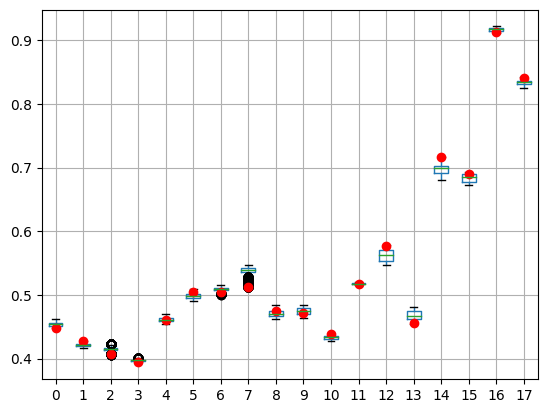

In [44]:
import matplotlib.pyplot as plt

ax = d_df.boxplot(positions=range(len(d_df.columns)))
plt.plot(d_df.iloc[0], "ro")

plt.show()

Even though the election results do not vary too much there's something potentially interesting going on: There seem to be a lot of variation within some districts.